# Analysis

In [1]:
import os
import json
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import soundfile as sf
from IPython.display import display, Audio

## Metadata

In [2]:
metadata = pd.read_csv('../data/binaural_musdb18/metadata.csv', index_col=0)

In [3]:
metadata.head()

,title,source,standard_angle,random_angle
0,AM Contra - Heart Peripheral,bass,27,-50
1,AM Contra - Heart Peripheral,drums,10,20
2,AM Contra - Heart Peripheral,other,-28,10
3,AM Contra - Heart Peripheral,vocals,-13,50
4,Al James - Schoolboy Facination,bass,29,40


## SPAUQ: Spatial Audio Quality Evaluation

In [4]:
ht_standard_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_htdemucs_ft_standard.csv')
ht_random_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_htdemucs_ft_random.csv')
ht_stereo_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_htdemucs_ft_stereo.csv')

h_standard_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-21_hdemucs_v3_standard.csv')
h_random_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-21_hdemucs_v3_random.csv')
h_stereo_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-21_hdemucs_v3_stereo.csv')

spleet_standard_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_spleeter_standard.csv')
spleet_random_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_spleeter_random.csv')
spleet_stereo_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_spleeter_stereo.csv')

umx_standard_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-24_umxhq_standard.csv')
umx_random_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-24_umxhq_random.csv')
umx_stereo_df = pd.read_csv('../data/eval/spauq/spauq_median_2025-03-23_umxhq_stereo.csv')

In [5]:
ht_standard_df['dataset'] = 'htdemucs_standard'
ht_random_df['dataset'] = 'htdemucs_random'
ht_stereo_df['dataset'] = 'htdemucs_stereo'

h_standard_df['dataset'] = 'hdemucs_v3_standard'
h_random_df['dataset'] = 'hdemucs_v3_random'
h_stereo_df['dataset'] = 'hdemucs_v3_stereo'

spleet_standard_df['dataset'] = 'spleeter_standard'
spleet_random_df['dataset'] = 'spleeter_random'
spleet_stereo_df['dataset'] = 'spleeter_stereo'

umx_standard_df['dataset'] = 'umxhq_standard'
umx_random_df['dataset'] = 'umxhq_random'
umx_stereo_df['dataset'] = 'umxhq_stereo'

In [6]:
hdemucs_df = pd.concat([h_standard_df, h_random_df, h_stereo_df], ignore_index=True)
htdemucs_df = pd.concat([ht_standard_df, ht_random_df, ht_stereo_df], ignore_index=True)
spleet_df = pd.concat([spleet_standard_df, spleet_random_df, spleet_stereo_df], ignore_index=True)
umx_df = pd.concat([umx_standard_df, umx_random_df, umx_stereo_df], ignore_index=True)

### H Demucs V3

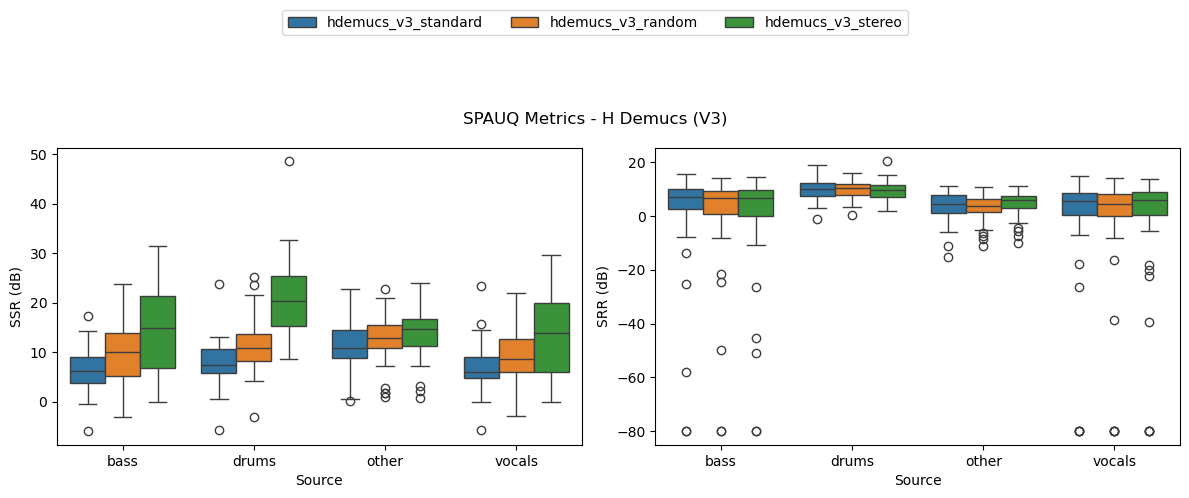

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)
sns.boxplot(x='source', y='SSR', hue='dataset', data=hdemucs_df, ax=axs[0])
sns.boxplot(x='source', y='SRR', hue='dataset', data=hdemucs_df, ax=axs[1])

axs[0].set(ylabel='SSR (dB)', xlabel='Source')
axs[1].set(ylabel='SRR (dB)', xlabel='Source')

h, l = axs[0].get_legend_handles_labels()

for a in axs:
    a.legend().remove()

fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.25))

fig.suptitle("SPAUQ Metrics - H Demucs (V3)")
# plt.savefig('../data/eval/plots/spauq_hdemucs_v3.pdf', bbox_inches='tight')
plt.show()

In [8]:
hdemucs_df[hdemucs_df['SSR'] == 0].groupby('dataset').source.value_counts()

dataset              source
hdemucs_v3_random    vocals    5
                     bass      3
hdemucs_v3_standard  vocals    4
                     bass      3
hdemucs_v3_stereo    vocals    5
                     bass      3
Name: count, dtype: int64

### HT Demucs FT

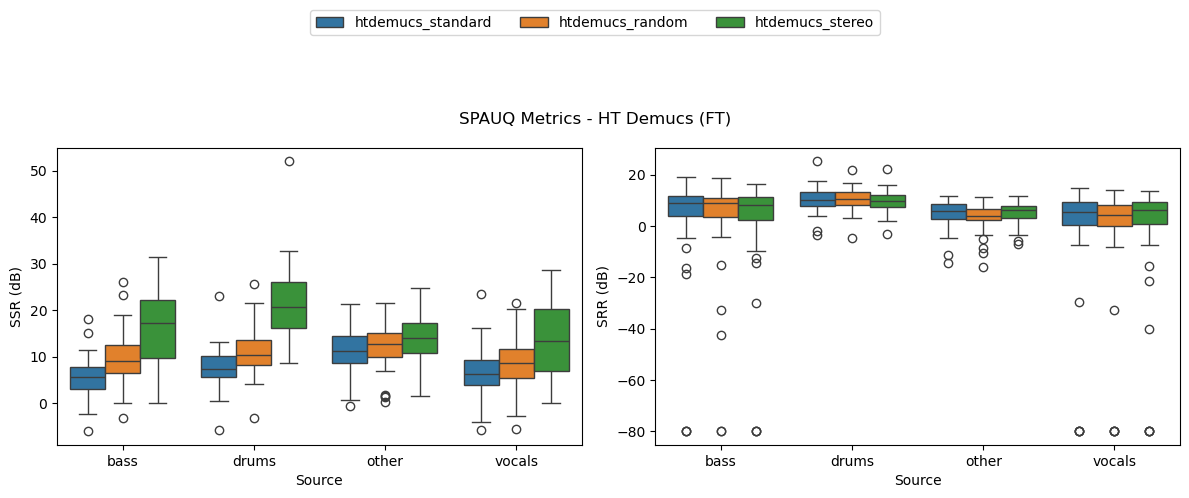

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)
sns.boxplot(x='source', y='SSR', hue='dataset', data=htdemucs_df, ax=axs[0])
sns.boxplot(x='source', y='SRR', hue='dataset', data=htdemucs_df, ax=axs[1])

axs[0].set(ylabel='SSR (dB)', xlabel='Source')
axs[1].set(ylabel='SRR (dB)', xlabel='Source')

h, l = axs[0].get_legend_handles_labels()

for a in axs:
    a.legend().remove()

fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.25))

fig.suptitle("SPAUQ Metrics - HT Demucs (FT)")
# plt.savefig('../data/eval/plots/spauq_htdemucs_ft.pdf', bbox_inches='tight')
plt.show()

In [10]:
htdemucs_df[htdemucs_df['SSR'] == 0].groupby('dataset').source.value_counts()

dataset            source
htdemucs_random    vocals    5
                   bass      3
htdemucs_standard  vocals    5
                   bass      3
htdemucs_stereo    vocals    5
                   bass      3
Name: count, dtype: int64

### Spleeter

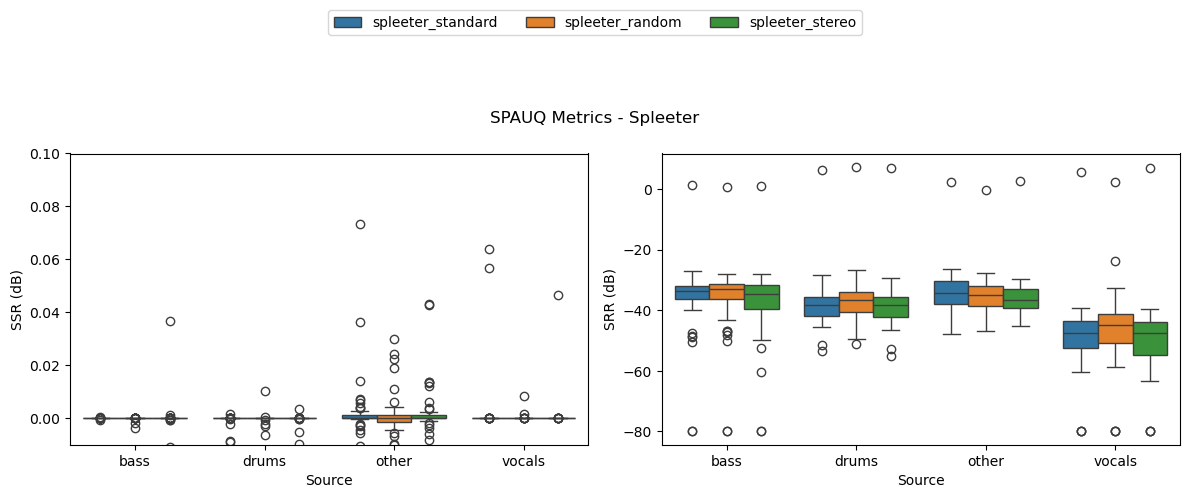

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)
sns.boxplot(x='source', y='SSR', hue='dataset', data=spleet_df, ax=axs[0])
sns.boxplot(x='source', y='SRR', hue='dataset', data=spleet_df, ax=axs[1])

axs[0].set(ylabel='SSR (dB)', xlabel='Source')
axs[1].set(ylabel='SRR (dB)', xlabel='Source')

axs[0].set_ylim([-0.01, 0.1])

h, l = axs[0].get_legend_handles_labels()

for a in axs:
    a.legend().remove()

fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.25))

fig.suptitle("SPAUQ Metrics - Spleeter")
# plt.savefig('../data/eval/plots/spauq_htdemucs_ft.pdf', bbox_inches='tight')
plt.show()

In [12]:
spleet_df[spleet_df['SSR'] == 0].groupby('dataset').source.value_counts()

dataset            source
spleeter_random    vocals    30
                   bass      26
                   drums     18
                   other     16
spleeter_standard  vocals    36
                   bass      28
                   drums     20
                   other     17
spleeter_stereo    vocals    34
                   bass      28
                   drums     21
                   other     13
Name: count, dtype: int64

In [13]:
# wtf is happening here
spleet_df[spleet_df['SSR'] == 0]

,title,source,SSR,SRR,cost,shift,scale,dataset
15,Arise - Run Run Run,vocals,0.0,-45.317021,11.128760,[[0. 0.]\n [0. 0.]],[[0. 0.]\n [0. 0.]],spleeter_standard
16,BKS - Bulldozer,bass,0.0,-29.280752,16.491938,[[0. 0.]\n [0. 0.]],[[0. 0.]\n [0. 0.]],spleeter_standard
19,BKS - Bulldozer,vocals,0.0,-53.763979,9.239440,[[0. 0.]\n [0. 0.]],[[0. 0.]\n [0. 0.]],spleeter_standard
20,BKS - Too Much,bass,0.0,-32.162120,11.950990,[[0. 0.]\n [0. 0.]],[[0.00000000e+00 0.00000000e+00]\n [0.00000000...,spleeter_standard
23,BKS - Too Much,vocals,0.0,-53.995961,4.048811,[[0. 0.]\n [0. 0.]],[[0. 0.]\n [0. 0.]],spleeter_standard
...,...,...,...,...,...,...,...,...
591,Triviul feat. The Fiend - Widow,vocals,0.0,-39.552934,17.789037,[[0. 0.]\n [0. 0.]],[[0. 0.]\n [0. 0.]],spleeter_stereo
594,We Fell From The Sky - Not You,other,0.0,-38.168475,18.729207,[[ -34. -202.]\n [ 0. -351.]],[[0. 0. ]\n [0. 0.00019...,spleeter_stereo
595,We Fell From The Sky - Not You,vocals,0.0,-55.740906,6.343922,[[0. 0.]\n [0. 0.]],[[0. 0.]\n [0. 0.]],spleeter_stereo
597,Zeno - Signs,drums,0.0,-35.619087,11.219330,[[ -12.5 -94. ]\n [-328. -130. ]],[[-5.01481028e-07 8.63776589e-06]\n [-1.20326...,spleeter_stereo


### Open-Unmix

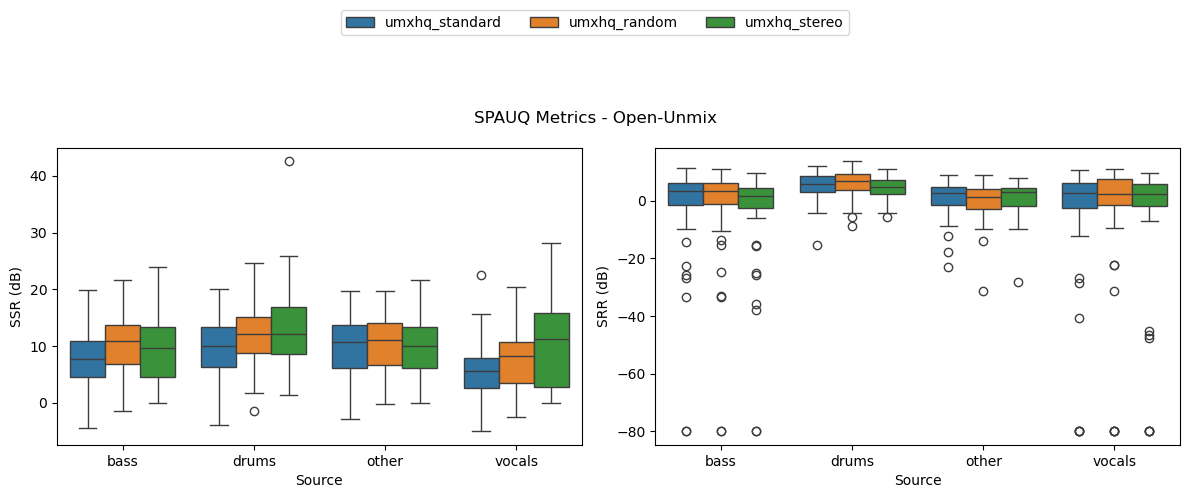

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)
sns.boxplot(x='source', y='SSR', hue='dataset', data=umx_df, ax=axs[0])
sns.boxplot(x='source', y='SRR', hue='dataset', data=umx_df, ax=axs[1])

axs[0].set(ylabel='SSR (dB)', xlabel='Source')
axs[1].set(ylabel='SRR (dB)', xlabel='Source')

h, l = axs[0].get_legend_handles_labels()

for a in axs:
    a.legend().remove()

fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.25))

fig.suptitle("SPAUQ Metrics - Open-Unmix")
# plt.savefig('../data/eval/plots/spauq_htdemucs_ft.pdf', bbox_inches='tight')
plt.show()

In [15]:
umx_df[umx_df['SSR'] == 0].groupby('dataset').source.value_counts()

dataset         source
umxhq_random    vocals    5
                bass      4
umxhq_standard  bass      5
                vocals    5
umxhq_stereo    vocals    5
                bass      4
Name: count, dtype: int64

## ITD / ILD Data

In [16]:
ht_standard_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_htdemucs_ft_standard.csv')
ht_random_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_htdemucs_ft_random.csv')
ht_stereo_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_htdemucs_ft_stereo.csv')

h_standard_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_hdemucs_v3_standard.csv')
h_random_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_hdemucs_v3_random.csv')
h_stereo_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_hdemucs_v3_stereo.csv')

spleet_standard_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_spleeter_standard.csv')
spleet_random_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_spleeter_random.csv')
spleet_stereo_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_spleeter_stereo.csv')

umx_standard_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_umxhq_stereo.csv')
umx_random_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_umxhq_random.csv')
umx_stereo_df = pd.read_csv('../data/eval/itd_ild/itd_ild_2025-03-24_umxhq_stereo.csv')

In [17]:
ht_standard_df['dataset'] = 'standard'
ht_random_df['dataset'] = 'random'
ht_stereo_df['dataset'] = 'stereo'

h_standard_df['dataset'] = 'standard'
h_random_df['dataset'] = 'random'
h_stereo_df['dataset'] = 'stereo'

spleet_standard_df['dataset'] = 'standard'
spleet_random_df['dataset'] = 'random'
spleet_stereo_df['dataset'] = 'stereo'

umx_standard_df['dataset'] = 'standard'
umx_random_df['dataset'] = 'random'
umx_stereo_df['dataset'] = 'stereo'

In [18]:
hdemucs_df = pd.concat([h_standard_df, h_random_df, h_stereo_df], ignore_index=True)
htdemucs_df = pd.concat([ht_standard_df, ht_random_df, ht_stereo_df], ignore_index=True)
spleet_df = pd.concat([spleet_standard_df, spleet_random_df, spleet_stereo_df], ignore_index=True)
umx_df = pd.concat([umx_standard_df, umx_random_df, umx_stereo_df], ignore_index=True)

In [19]:
hdemucs_df['diff_ITD_microsec'] = hdemucs_df['diff_ITD'] * 1e6
htdemucs_df['diff_ITD_microsec'] = htdemucs_df['diff_ITD'] * 1e6
spleet_df['diff_ITD_microsec'] = spleet_df['diff_ITD'] * 1e6
umx_df['diff_ITD_microsec'] = umx_df['diff_ITD'] * 1e6

### Interaural Time Difference (ITD)

#### H Demucs V3

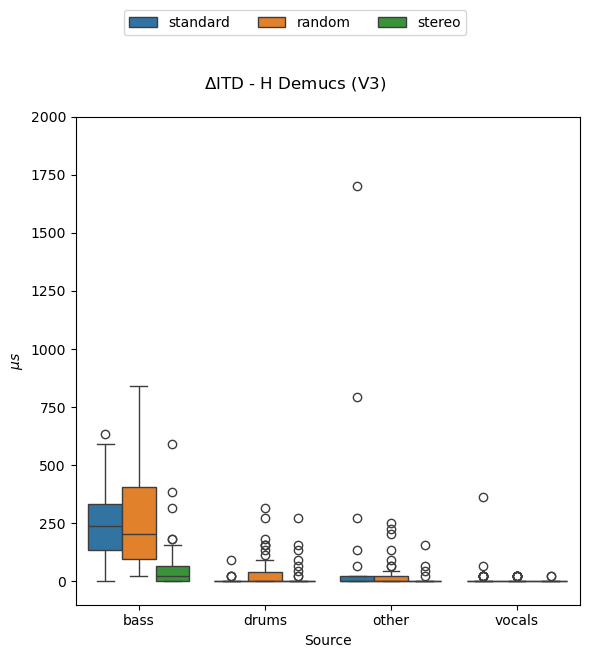

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ITD_microsec', hue='dataset', data=hdemucs_df, ax=ax)

ax.set_ylim([-100, 2000])

h, l = ax.get_legend_handles_labels()

ax.legend().remove()
ax.set(ylabel='$\mu s$', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - H Demucs (V3)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### HT Demucs FT

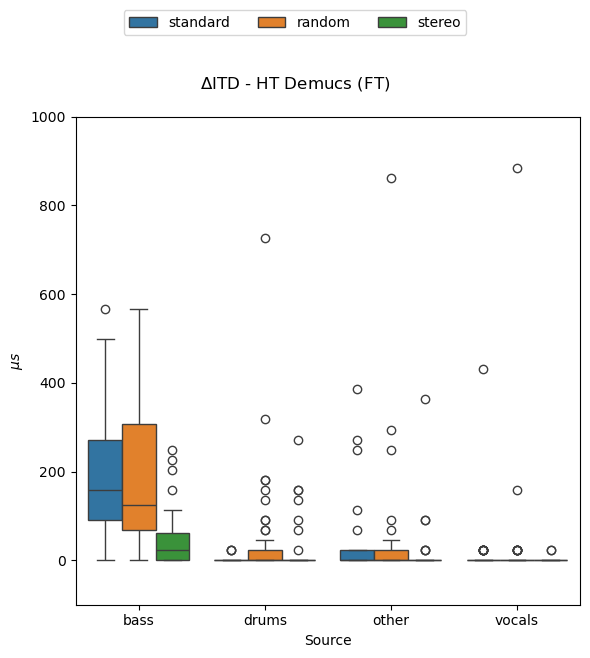

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ITD_microsec', hue='dataset', data=htdemucs_df, ax=ax)

ax.set_ylim([-100, 1000])

h, l = ax.get_legend_handles_labels()

ax.legend().remove()
ax.set(ylabel='$\mu s$', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - HT Demucs (FT)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Spleeter

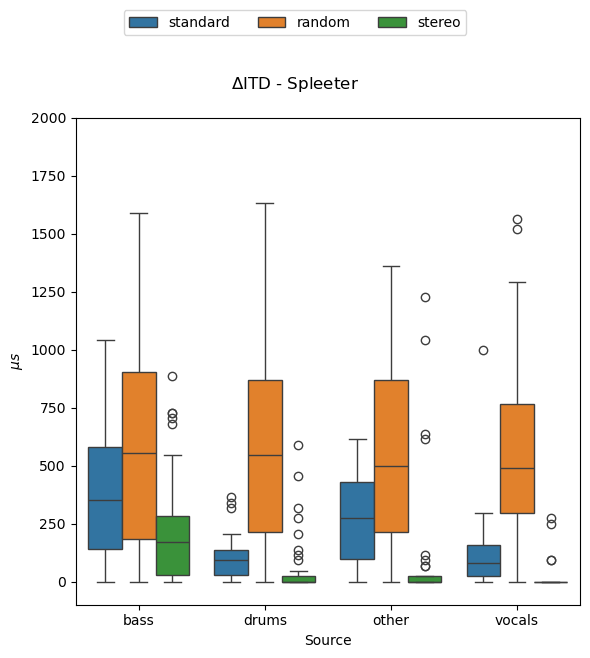

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ITD_microsec', hue='dataset', data=spleet_df, ax=ax)

ax.set_ylim([-100, 2000])

h, l = ax.get_legend_handles_labels()

ax.legend().remove()
ax.set(ylabel='$\mu s$', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - Spleeter")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Open-Unmix

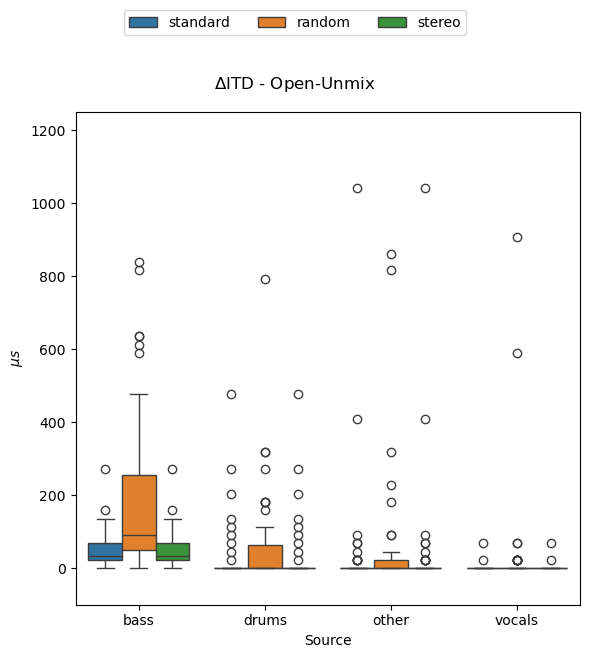

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ITD_microsec', hue='dataset', data=umx_df, ax=ax)

ax.set_ylim([-100, 1250])

h, l = ax.get_legend_handles_labels()

ax.legend().remove()
ax.set(ylabel='$\mu s$', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - Open-Unmix")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

### Interaural Level Difference (ILD)

#### H Demucs V3

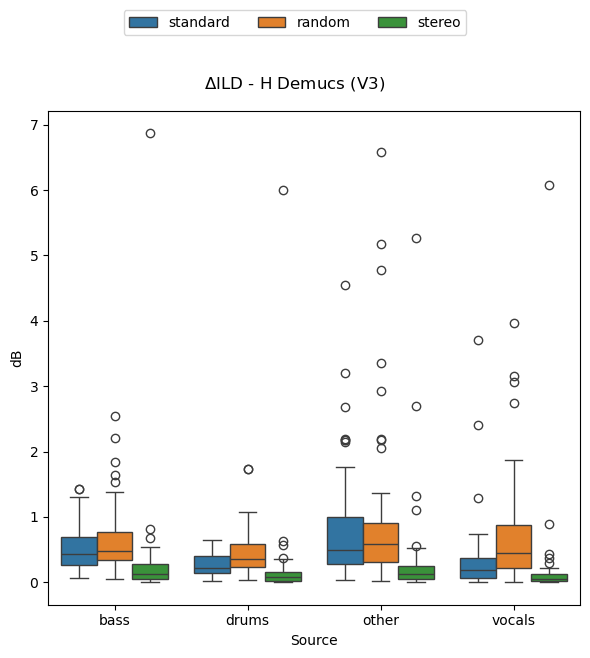

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ILD', hue='dataset', data=hdemucs_df, ax=ax)

h, l = ax.get_legend_handles_labels()

ax.legend().remove()
ax.set(ylabel='dB', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - H Demucs (V3)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### HT Demucs FT

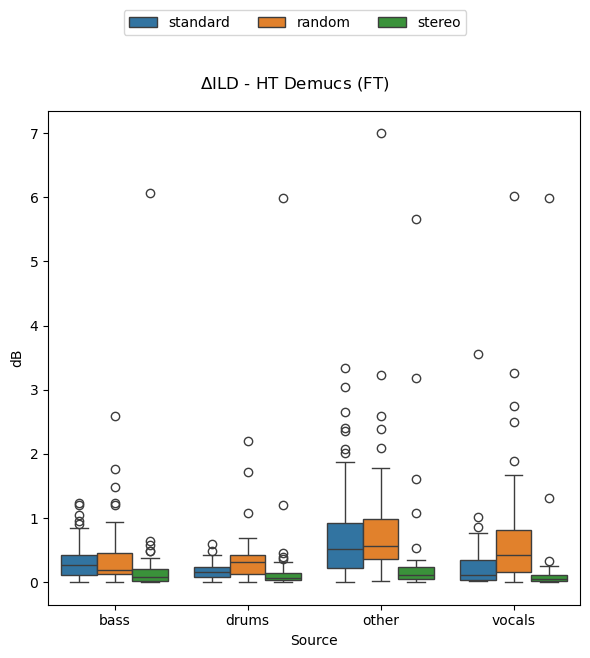

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ILD', hue='dataset', data=htdemucs_df, ax=ax)

h, l = ax.get_legend_handles_labels()

ax.legend().remove()
ax.set(ylabel='dB', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - HT Demucs (FT)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Spleeter

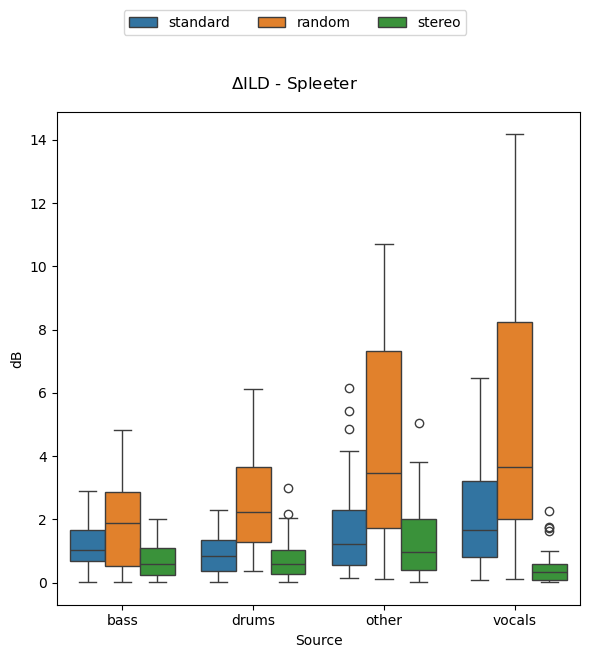

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ILD', hue='dataset', data=spleet_df, ax=ax)

h, l = ax.get_legend_handles_labels()

ax.legend().remove()
ax.set(ylabel='dB', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - Spleeter")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Open-Unmix

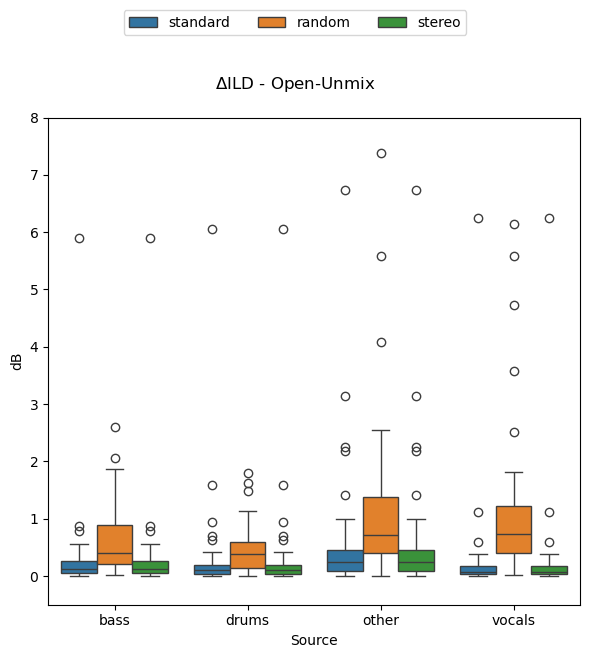

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)

sns.boxplot(x='source', y='diff_ILD', hue='dataset', data=umx_df, ax=ax)

ax.set_ylim([-0.5, 8])

h, l = ax.get_legend_handles_labels()

ax.legend().remove()
ax.set(ylabel='dB', xlabel='Source')
fig.legend(h, l, loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - Open-Unmix")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

## By Angle

In [28]:
metadata = pd.read_csv('../data/binaural_musdb18/metadata.csv', index_col=0)
metadata.rename(columns={'standard_angle': 'standard', 'random_angle': 'random'}, inplace=True)

In [29]:
metadata = metadata.melt(id_vars=['title', 'source'], var_name='dataset', value_name='angle')

#### H Demucs V3

In [30]:
merged_df = pd.merge(metadata, hdemucs_df, how='inner')
b = np.arange(-90, 91, 30)
merged_df['bins'] = pd.cut(merged_df['angle'], bins=b)

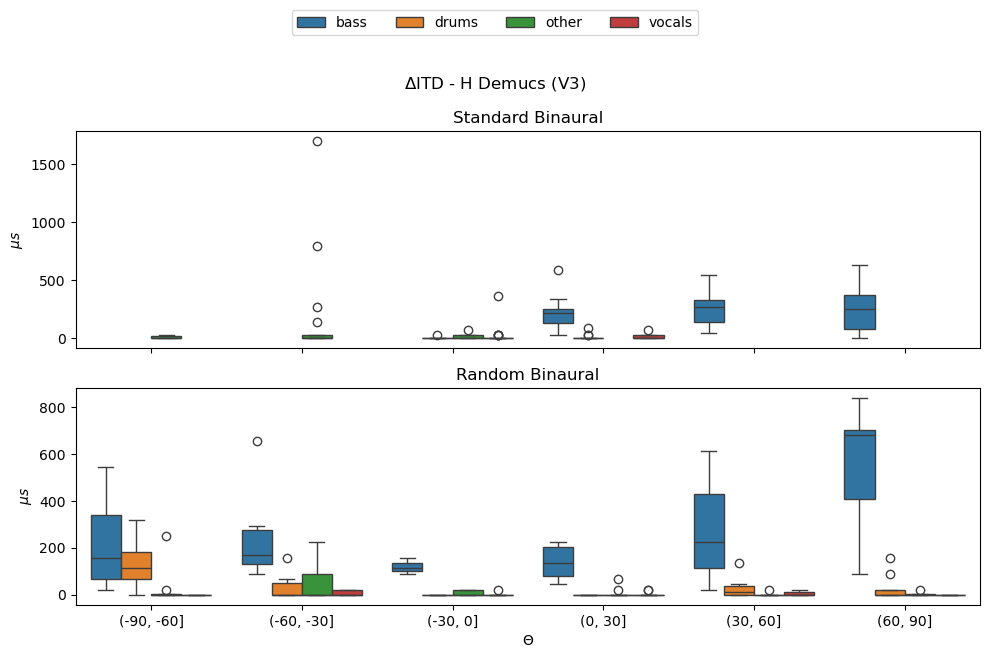

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), tight_layout=True, sharex=True)

sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0])
sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1])

# ax[0].set_ylim([-50, 800])

h, l = ax[0].get_legend_handles_labels()

for a in ax:
    a.legend().remove()
    a.invert_xaxis()

ax[0].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - H Demucs (V3)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

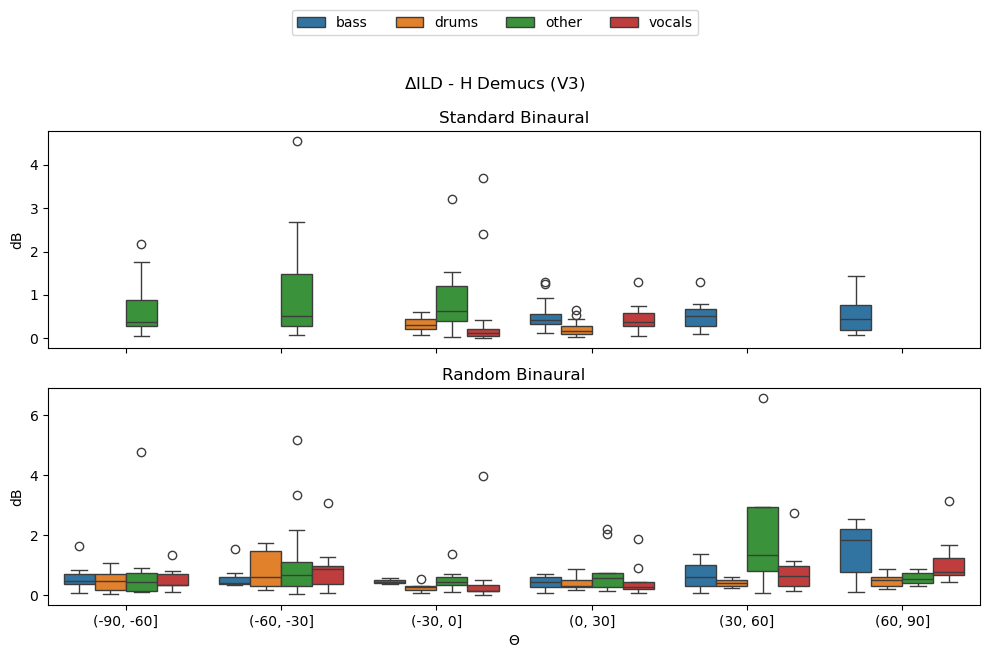

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), tight_layout=True, sharex=True)

sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0])
sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1])

h, l = ax[0].get_legend_handles_labels()
ax[0].legend().remove()
ax[1].legend().remove()

ax[0].set(ylabel='dB', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='dB', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - H Demucs (V3)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Hybrid T Demucs (FT)

In [33]:
merged_df = pd.merge(metadata, htdemucs_df, how='inner')
b = np.arange(-90, 91, 30)
merged_df['bins'] = pd.cut(merged_df['angle'], bins=b)

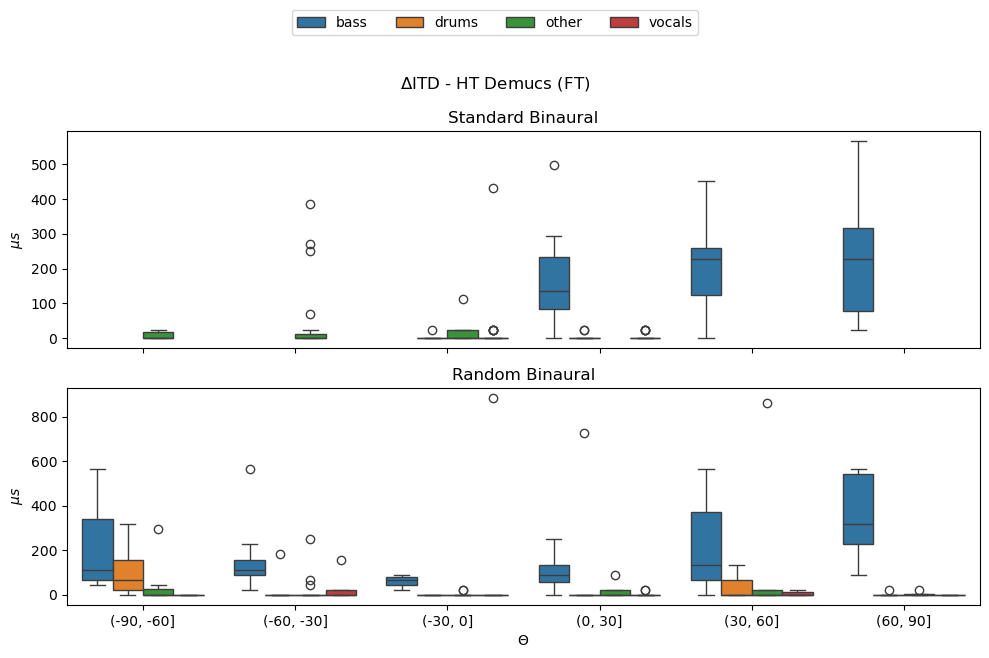

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), tight_layout=True, sharex=True)

sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0])
sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1])

# ax[0].set_ylim([-50, 800])

h, l = ax[0].get_legend_handles_labels()

for a in ax:
    a.legend().remove()
    a.invert_xaxis()

ax[0].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - HT Demucs (FT)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

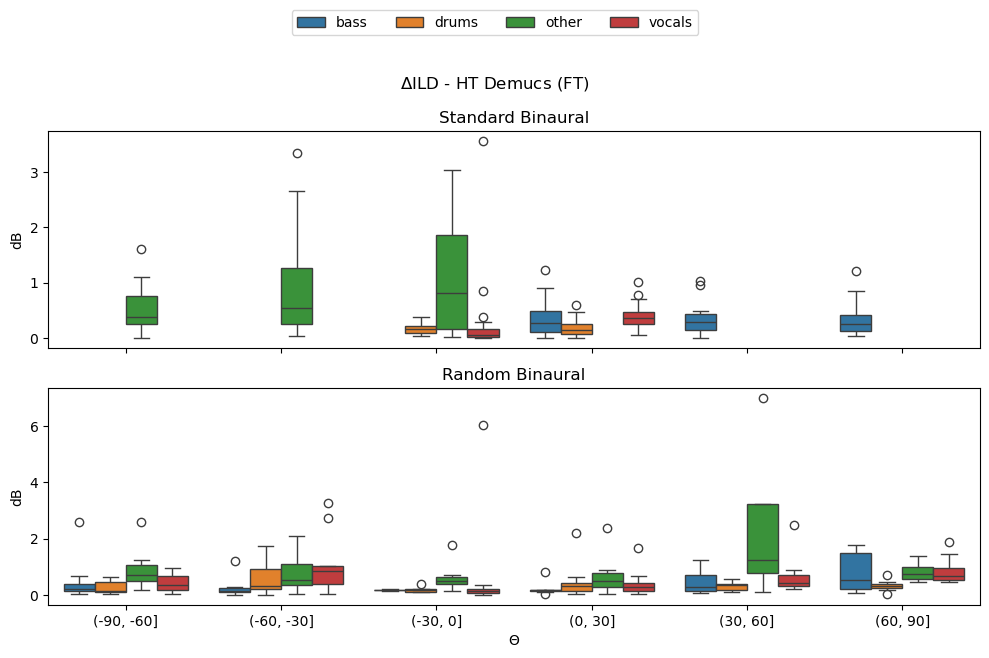

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), tight_layout=True, sharex=True)

sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0])
sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1])

h, l = ax[0].get_legend_handles_labels()
ax[0].legend().remove()
ax[1].legend().remove()

ax[0].set(ylabel='dB', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='dB', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - HT Demucs (FT)")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Spleeter

In [36]:
merged_df = pd.merge(metadata, spleet_df, how='inner')
b = np.arange(-90, 91, 30)
merged_df['bins'] = pd.cut(merged_df['angle'], bins=b)

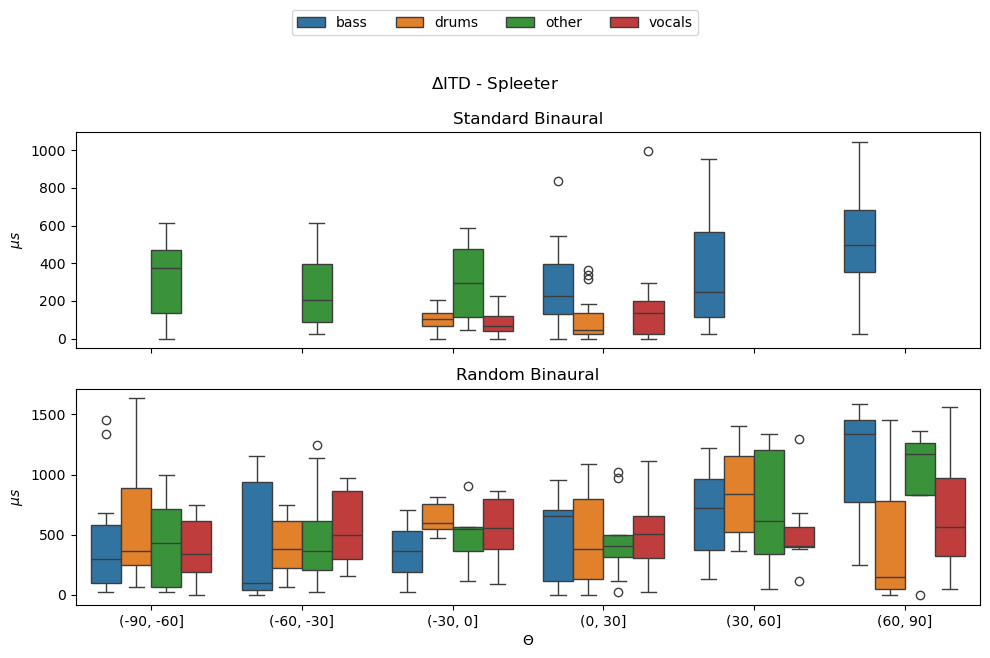

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), tight_layout=True, sharex=True)

sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0])
sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1])

# ax[0].set_ylim([-50, 800])

h, l = ax[0].get_legend_handles_labels()

for a in ax:
    a.legend().remove()
    a.invert_xaxis()

ax[0].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - Spleeter")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

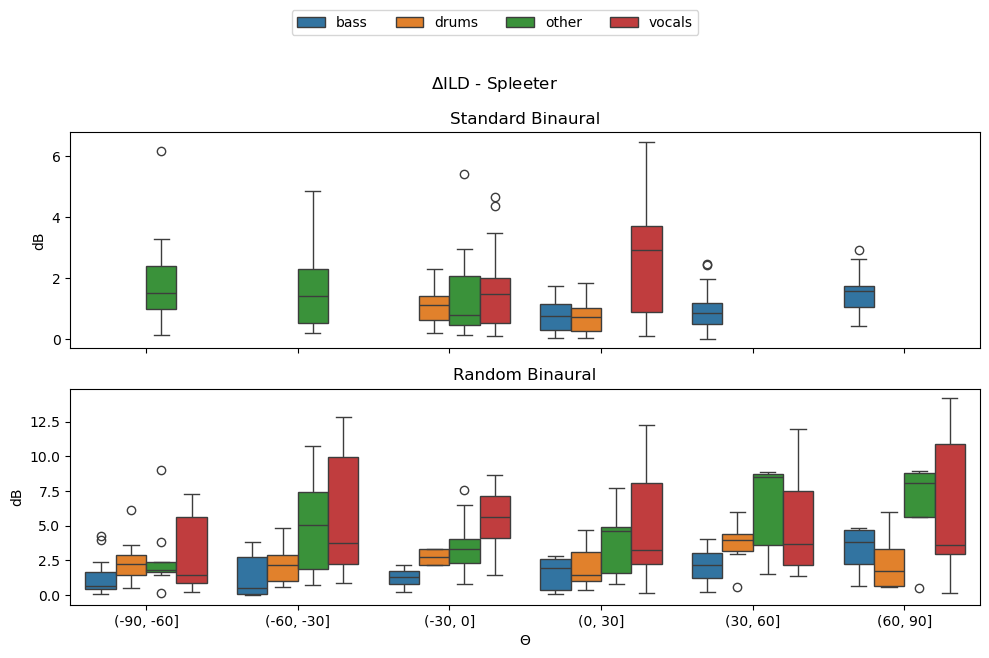

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), tight_layout=True, sharex=True)

sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0])
sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1])

h, l = ax[0].get_legend_handles_labels()
ax[0].legend().remove()
ax[1].legend().remove()

ax[0].set(ylabel='dB', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='dB', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - Spleeter")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

#### Open-Unmix

In [39]:
merged_df = pd.merge(metadata, umx_df, how='inner')
b = np.arange(-90, 91, 30)
merged_df['bins'] = pd.cut(merged_df['angle'], bins=b)

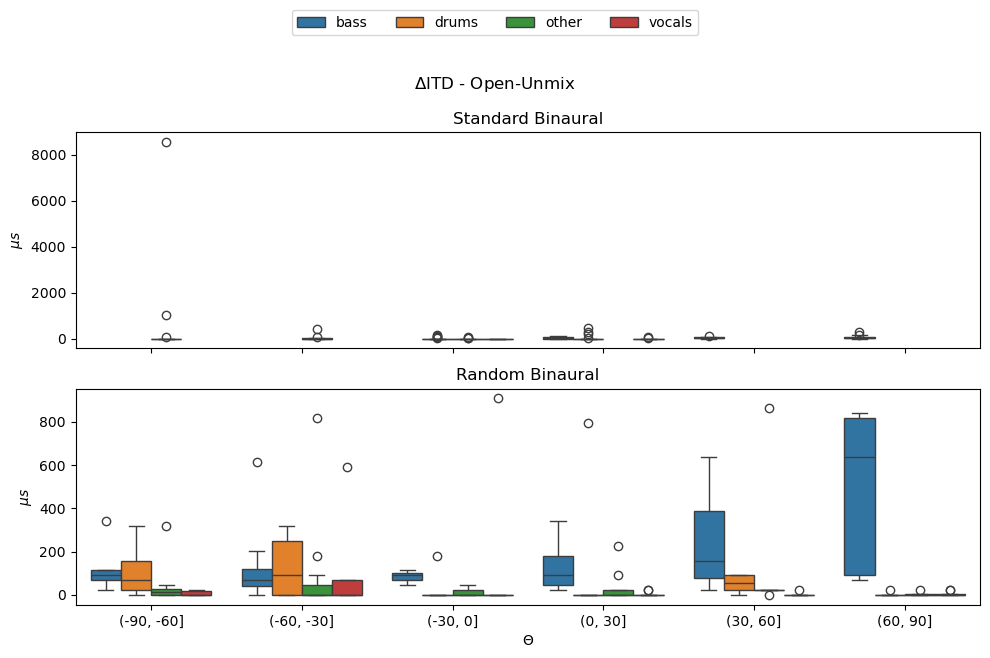

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), tight_layout=True, sharex=True)

sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0])
sns.boxplot(x='bins', y='diff_ITD_microsec', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1])

# ax[0].set_ylim([-50, 800])

h, l = ax[0].get_legend_handles_labels()

for a in ax:
    a.legend().remove()
    a.invert_xaxis()

ax[0].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='$\mu s$', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ITD - Open-Unmix")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()

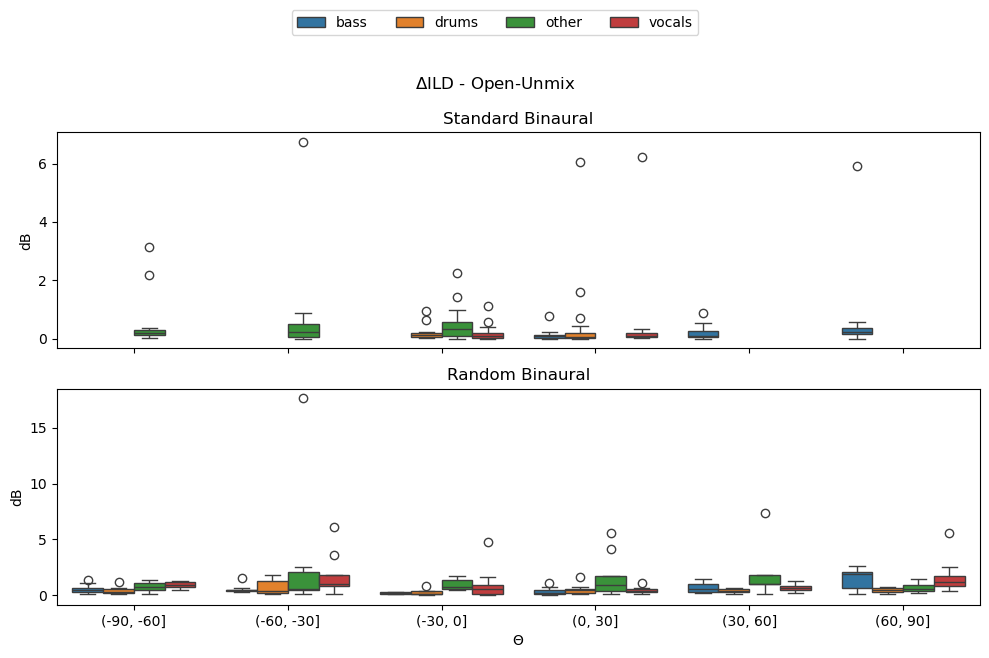

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), tight_layout=True, sharex=True)

sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'standard'], ax=ax[0])
sns.boxplot(x='bins', y='diff_ILD', hue='source', data=merged_df[merged_df['dataset'] == 'random'], ax=ax[1])

h, l = ax[0].get_legend_handles_labels()
ax[0].legend().remove()
ax[1].legend().remove()

ax[0].set(ylabel='dB', xlabel='$\Theta$', title='Standard Binaural')
ax[1].set(ylabel='dB', xlabel='$\Theta$', title='Random Binaural')

fig.legend(h, l, loc='upper center', fontsize=10, ncols=4, bbox_to_anchor=(0.5, 1.1))
fig.suptitle("$\Delta$ILD - Open-Unmix")
# plt.savefig('../data/eval/plots/itd_demucs.pdf', bbox_inches='tight')
plt.show()